# 데이터 로드

In [21]:
import pandas as pd

df = pd.read_csv("../data/diabetes.csv")

display(df.describe())
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# train, test set 나누기

In [40]:
split_count = int(df.shape[0] * 0.8)
train = df[:split_count].copy()  # df에 영향이 가지 않도록 copy
test = df[split_count:].copy()

print(f"전체 데이터 수: {len(df)}, train 데이터 수: {len(train)}, test 데이터 수: {len(test)}")

전체 데이터 수: 768, train 데이터 수: 614, test 데이터 수: 154


In [62]:
feature_names = train.columns[:-1].tolist()
label_name = train.columns[-1]

print(f"feature_names: {feature_names}")
print(f"label_name: {label_name}")

feature_names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
label_name: Outcome


In [69]:
# train data set
X_train = train[feature_names]
y_train = train[label_name]

# test data set
X_test = test[feature_names]
y_test = test[label_name]

# DecisionTree 기반 학습 및 예측

In [73]:
from sklearn.tree import DecisionTreeClassifier

# 학습
model = DecisionTreeClassifier()  # 당뇨병인지(1) 아닌지(0) -> classification
model.fit(X_train, y_train)

# 예측
y_predict = model.predict(X_test)
y_predict

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

# 모델 성능 측정


[Text(0.5707475786924939, 0.9705882352941176, 'Glucose <= 154.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.1917372881355932, 0.9117647058823529, 'BMI <= 26.35\ngini = 0.385\nsamples = 518\nvalue = [383, 135]'),
 Text(0.0387409200968523, 0.8529411764705882, 'Glucose <= 124.5\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(0.01937046004842615, 0.7941176470588235, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(0.009685230024213076, 0.7352941176470589, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.029055690072639227, 0.7352941176470589, 'DiabetesPedigreeFunction <= 0.705\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.01937046004842615, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0387409200968523, 0.6764705882352942, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.05811138014527845, 0.7941176470588235, 'BloodPressure <= 56.0\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),


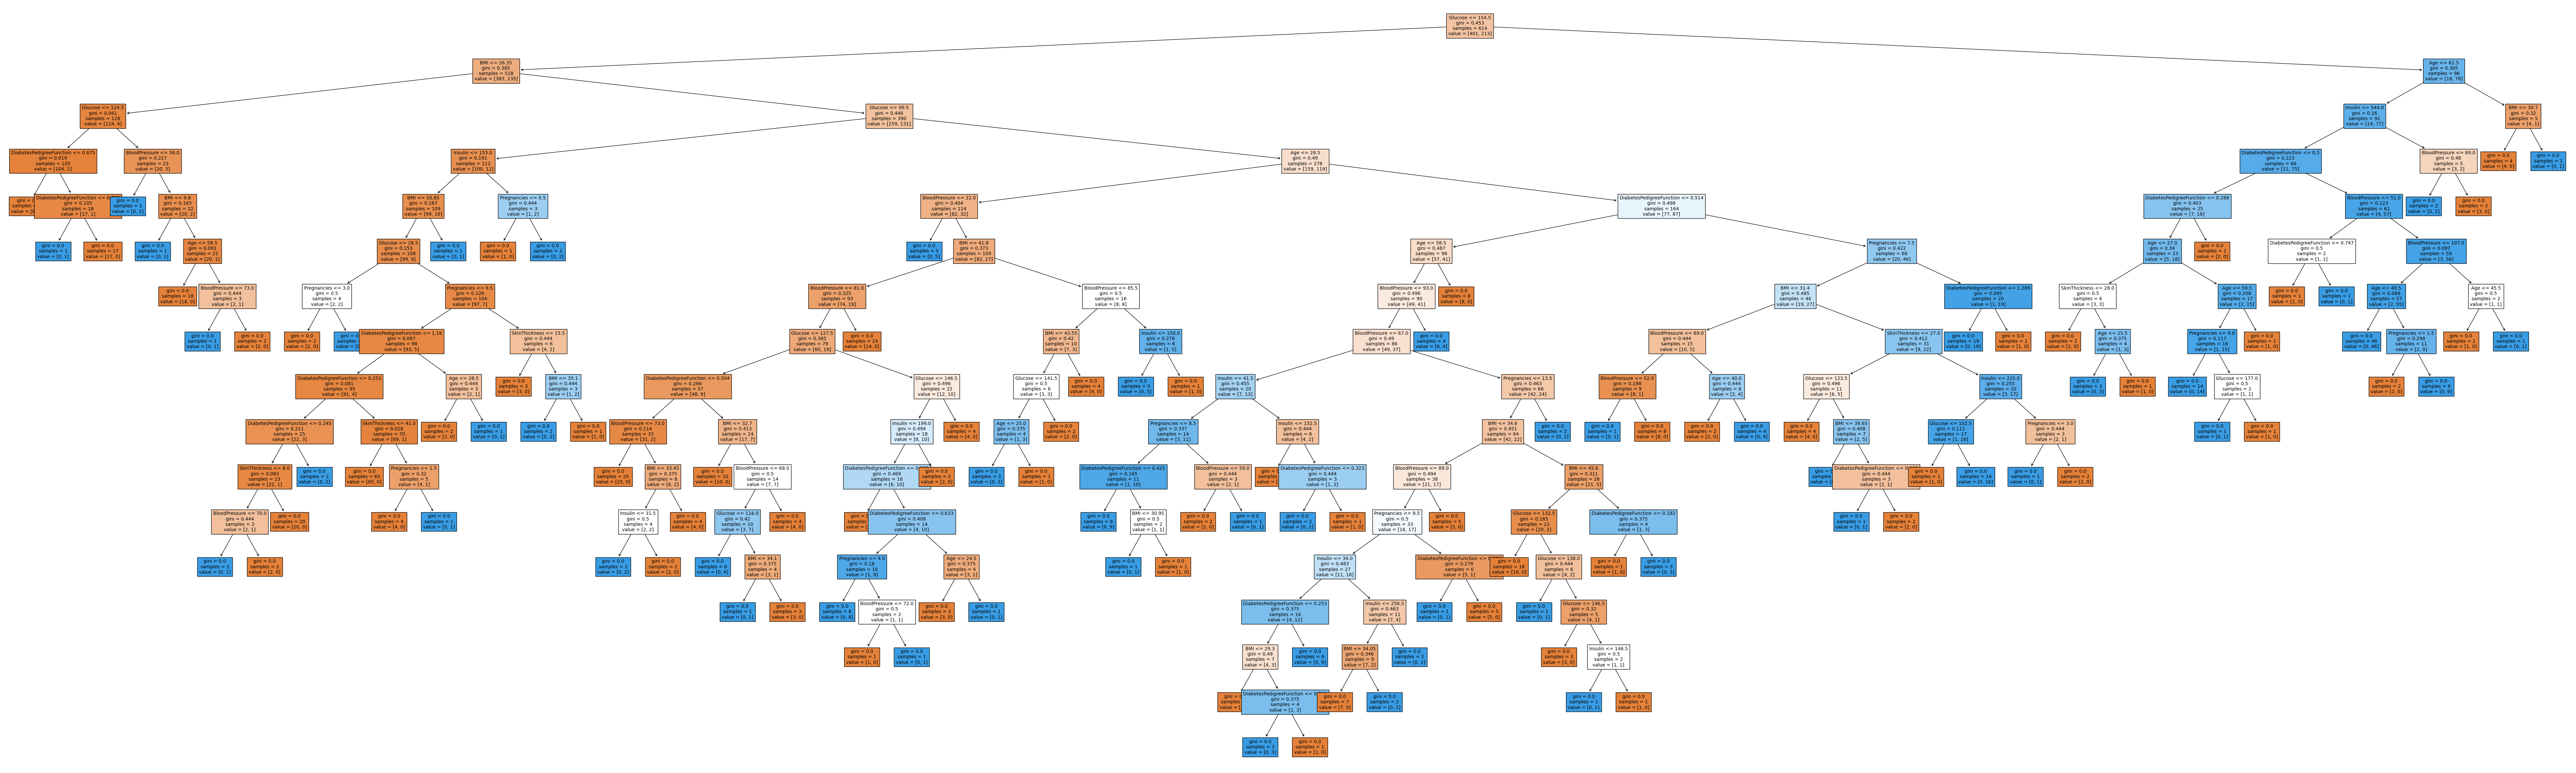

In [78]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 30))

plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=10,
)

model.feature_importances_: [0.07477739 0.30516724 0.12356611 0.02158061 0.06812831 0.17467765
 0.12783686 0.10426583]


<Axes: >

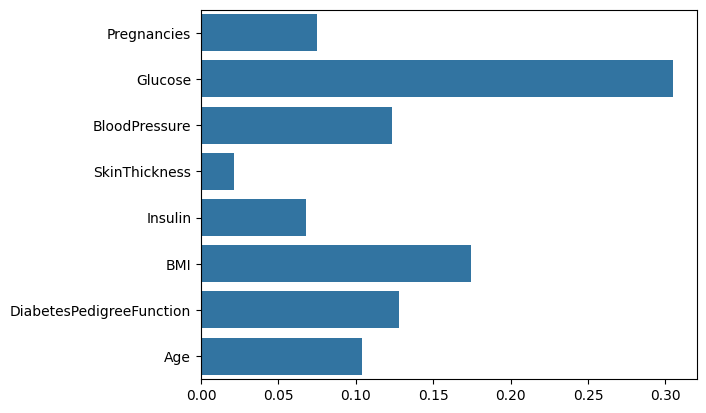

In [84]:
import seaborn as sns

# feature의 중요도 시각화
print(f"model.feature_importances_: {model.feature_importances_}")

sns.barplot(
    x=model.feature_importances_,
    y=feature_names,
)


In [86]:
# accuracy 측정 - 예측값과 실제 test 값 직접 비교
diff_count = abs(y_test - y_predict).sum()  # 예측이 틀린 경우의 수
correct_count = len(y_test) - diff_count  # 전체 - 예측이 틀린 수
accuracy = correct_count / len(y_test)
print(f"정확도: {accuracy}")

정확도: 0.7142857142857143


In [88]:
# accuracy 측정 - sklearn 사용

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
print(f"정확도: {accuracy}")

정확도: 0.7142857142857143


In [90]:
# accuracy 측정 - classifier 사용

accuracy = model.score(X_test, y_test)
print(f"정확도: {accuracy}")

정확도: 0.7142857142857143
